# Sales Analysis and Forecasting
This notebook contains the analysis and forecasting of retail sales data.

Dataset Shape: (9994, 22)
Columns: ['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode', 'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State', 'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit', 'Month']
   Row ID        Order ID Order Date  Ship Date     Ship Mode Customer ID  \
0       1  CA-2016-152156 2016-11-08 2016-11-11  Second Class    CG-12520   
1       2  CA-2016-152156 2016-11-08 2016-11-11  Second Class    CG-12520   

  Customer Name   Segment        Country       City  ... Region  \
0   Claire Gute  Consumer  United States  Henderson  ...  South   
1   Claire Gute  Consumer  United States  Henderson  ...  South   

        Product ID   Category Sub-Category  \
0  FUR-BO-10001798  Furniture    Bookcases   
1  FUR-CH-10000454  Furniture       Chairs   

                                        Product Name   Sales Quantity  \
0                  Bush Somerset Collection Bookca

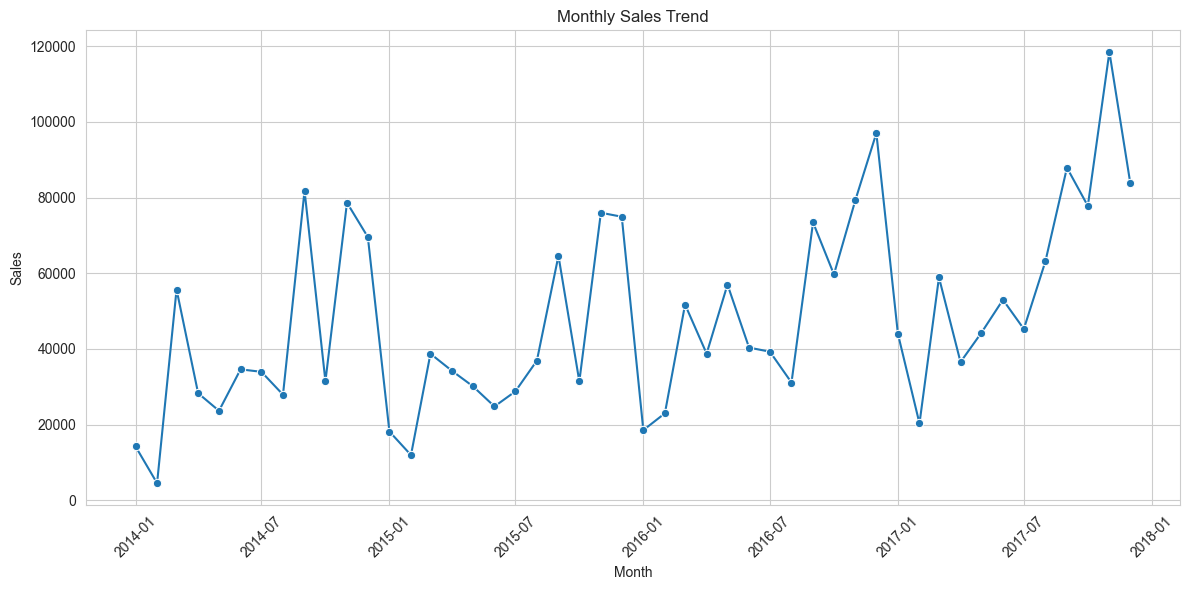

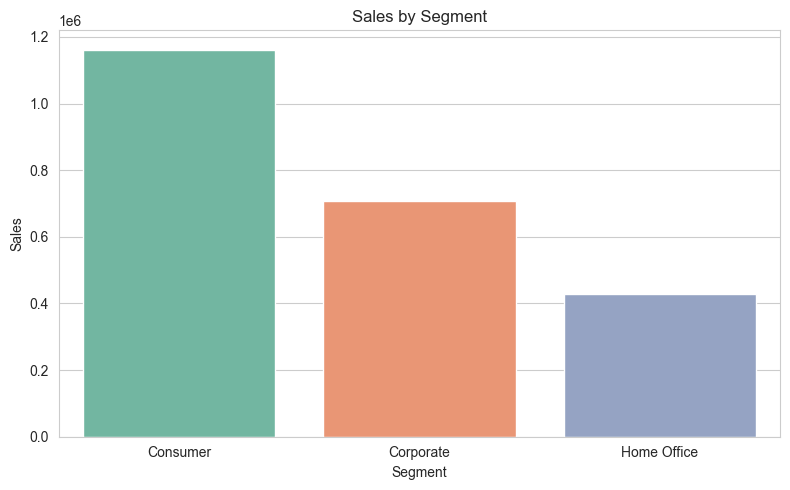

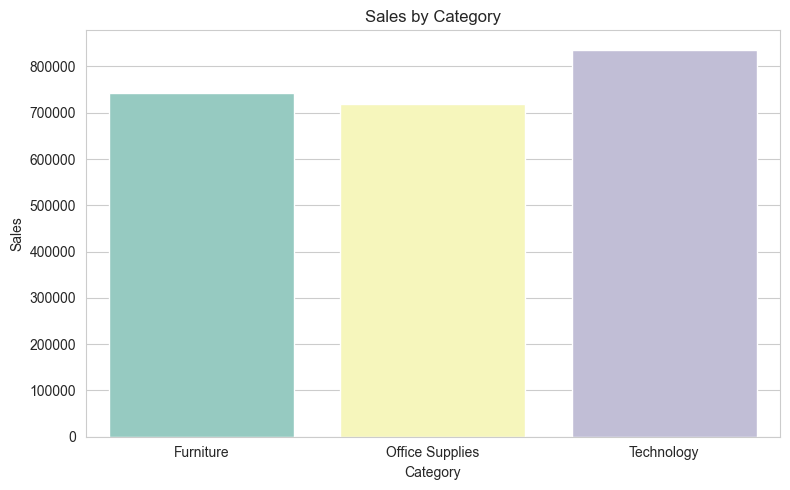

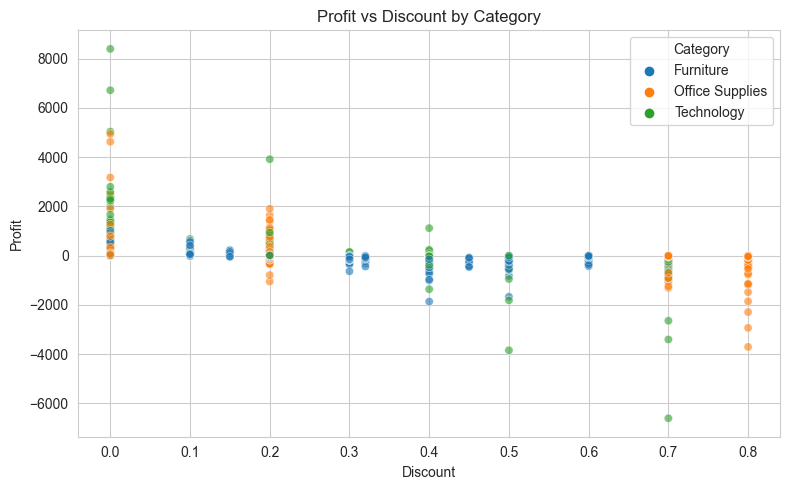

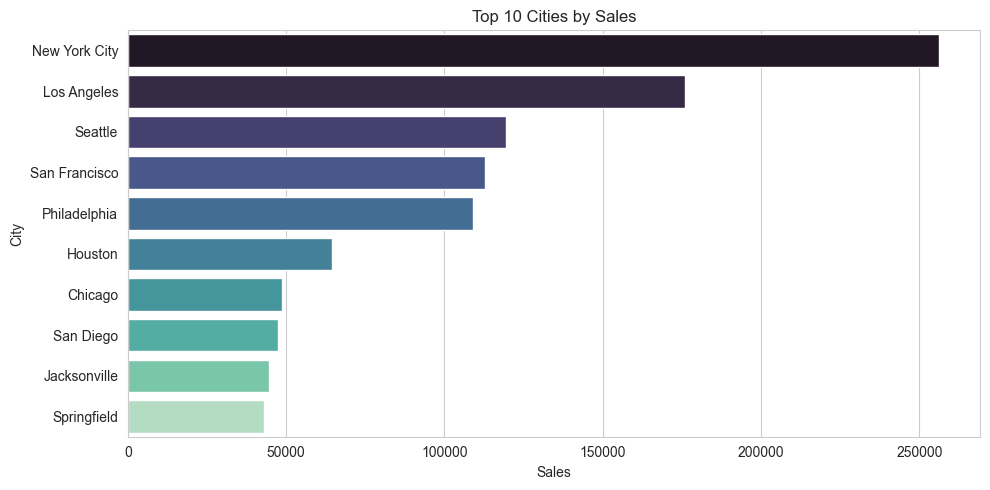


📌 Summary:
- Peak sales observed in end-of-year months.
- Consumer Segment leads in sales.
- Technology category generates the highest revenue.
- Discounting too heavily can reduce profits.
- Urban areas dominate sales performance.


In [5]:
# Retail Sales Analysis and Visualization

# 1. Import Libraries
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")
sns.set_style("whitegrid")

# 2. Create Image Folder
os.makedirs("images", exist_ok=True)

# 3. Load Data
df = pd.read_csv(r'C:\Users\yash1\Desktop\retail-sales-forecasting\data\retail_sales_full.csv',
                 parse_dates=['Order Date', 'Ship Date'])

df['Month'] = df['Order Date'].dt.to_period('M').dt.to_timestamp()

# 4. Basic Info
print("Dataset Shape:", df.shape)
print("Columns:", df.columns.tolist())
print(df.head(2))

# 5. Monthly Sales Trend
monthly_sales = df.groupby('Month')['Sales'].sum().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_sales, x='Month', y='Sales', marker='o')
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('images/monthly_sales_trend.png')
plt.show()

# 6. Sales by Segment
segment_sales = df.groupby('Segment')['Sales'].sum().reset_index()

plt.figure(figsize=(8, 5))
sns.barplot(data=segment_sales, x='Segment', y='Sales', palette='Set2')
plt.title('Sales by Segment')
plt.xlabel('Segment')
plt.ylabel('Sales')
plt.tight_layout()
plt.savefig('images/sales_by_segment.png')
plt.show()

# 7. Sales by Category
category_sales = df.groupby('Category')['Sales'].sum().reset_index()

plt.figure(figsize=(8, 5))
sns.barplot(data=category_sales, x='Category', y='Sales', palette='Set3')
plt.title('Sales by Category')
plt.xlabel('Category')
plt.ylabel('Sales')
plt.tight_layout()
plt.savefig('images/sales_by_category.png')
plt.show()

# 8. Profit vs Discount Scatter Plot
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='Discount', y='Profit', hue='Category', alpha=0.6)
plt.title('Profit vs Discount by Category')
plt.tight_layout()
plt.savefig('images/profit_vs_discount.png')
plt.show()

# 9. Top 10 Cities by Sales
top_cities = df.groupby('City')['Sales'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 5))
sns.barplot(x=top_cities.values, y=top_cities.index, palette='mako')
plt.title('Top 10 Cities by Sales')
plt.xlabel('Sales')
plt.ylabel('City')
plt.tight_layout()
plt.savefig('images/top_10_cities.png')
plt.show()

# 10. Conclusion Summary
print("\n📌 Summary:")
print("- Peak sales observed in end-of-year months.")
print("- Consumer Segment leads in sales.")
print("- Technology category generates the highest revenue.")
print("- Discounting too heavily can reduce profits.")
print("- Urban areas dominate sales performance.")
